In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_tgt_g_salary_17-18')

In [3]:
tes.dtypes

NAME           object
TGT/G         float64
TGT/G_rank    float64
salary          int64
dtype: object

In [4]:
tes.head()

,NAME,TGT/G,TGT/G_rank,salary
0,Travis Kelce,8.1,1.0,9368400
1,Zach Ertz,7.9,2.0,8500000
2,Evan Engram,7.7,3.0,2679576
3,Rob Gronkowski,7.5,4.0,9000000
4,Jack Doyle,7.2,5.0,6300000


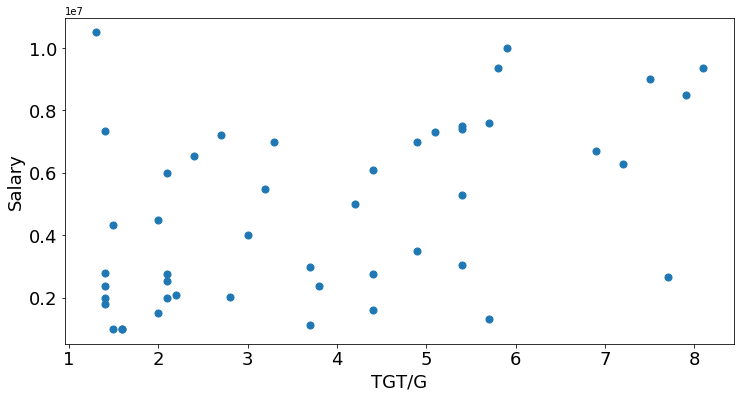

In [5]:
ax = tes.plot(kind="scatter", x = 'TGT/G',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TGT/G', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['TGT/G', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.69288138e-16,  0.00000000e+00])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.94959104, -0.84309577],
       [ 1.56584249,  1.33865221],
       [ 0.49989315, -0.83644711],
       [-0.72463357,  0.87323696],
       [ 0.60074449,  0.69179151]])

In [11]:
km.predict(X)

array([1, 1, 2, 1, 1, 1, 1, 1, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2,
       2, 2, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,TGT/G,TGT/G_rank,salary,clusters
0,Travis Kelce,8.1,1.0,9368400,1
1,Zach Ertz,7.9,2.0,8500000,1
2,Evan Engram,7.7,3.0,2679576,2
3,Rob Gronkowski,7.5,4.0,9000000,1
4,Jack Doyle,7.2,5.0,6300000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.88125000e+00, 2.35996625e+06],
       [7.04285714e+00, 8.45798571e+06],
       [4.85555556e+00, 2.37854933e+06],
       [2.34285714e+00, 7.15714286e+06],
       [5.06250000e+00, 6.65000000e+06]])

In [14]:
tes.groupby('clusters')[['TGT/G', 'salary']].mean()

,TGT/G,salary
clusters,,
0,1.881250,2.359966e+06
1,7.042857,8.457986e+06
2,4.855556,2.378549e+06
3,2.342857,7.157143e+06
4,5.062500,6.650000e+06


In [15]:
centroids = tes.groupby('clusters')[['TGT/G', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

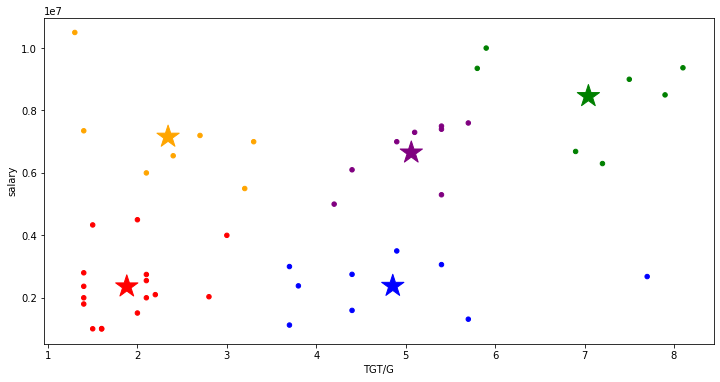

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

14.217450948195074

In [18]:
silhouette_score(X, km.labels_)

0.4494548504162242